# Final Project - Machine Learning 2024/25

### Supervised Learning algorithms - Predicting heart disease

For every algorithm we optimise one hyperparameter which is important to the specific algortihm.

In [72]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [73]:
# read preprocessed data
data = pd.read_csv("data/balancedReducedData.csv")
#data = data.sample(2000)
len(data)


2000

In [74]:
# split data into train and test subsets
train, test = train_test_split(data, test_size = 0.3, train_size=0.7, random_state= 13)

# separate the predictors and the criterion variable
trainDataWithoutCrit = train.drop('Heart_Disease', axis=1)  
trainCrit = train['Heart_Disease']       

testDataWithoutCrit = test.drop('Heart_Disease', axis=1)  
testCrit = test['Heart_Disease']  

# Decision Tree

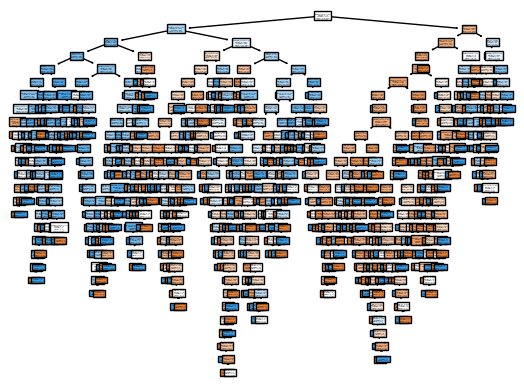

train data accuracy: 1.0
test data accuracy: 0.6


In [75]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
#plt.savefig('first-huge-tree.svg', format='svg')
plt.show()

# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


### What do we observe?

We know that one of the biggest problems with deision trees is overfitting.
As we can see here, the classifier has a perfect training performance but the test performance can be improved. 

We will now use pre-prunning (define the max-depth that the tree should have) to get a worse training but hopefully a better test performance:

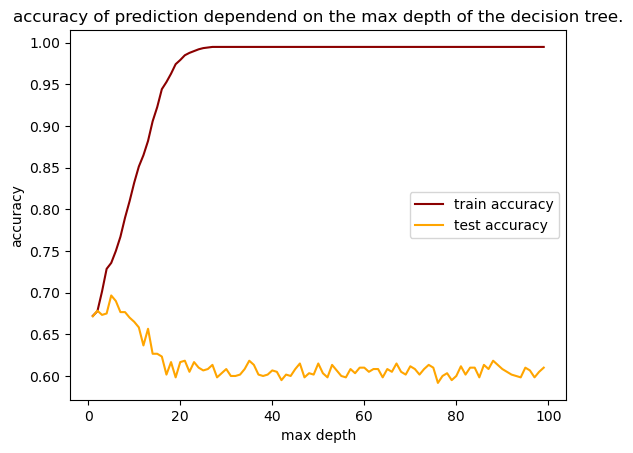

In [76]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('tree-accuracy-max-depth.svg', format='svg')
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

[Text(0.5600961538461539, 0.9166666666666666, 'General_Health <= 3.5\nentropy = 1.0\nsamples = 1400\nvalue = [703, 697]\nclass = Healthy'),
 Text(0.3076923076923077, 0.75, 'General_Health <= 2.5\nentropy = 0.943\nsamples = 850\nvalue = [306, 544]\nclass = Diseased'),
 Text(0.15384615384615385, 0.5833333333333334, 'BMI <= 44.77\nentropy = 0.796\nsamples = 382\nvalue = [92, 290]\nclass = Diseased'),
 Text(0.07692307692307693, 0.4166666666666667, 'Sex <= 0.5\nentropy = 0.772\nsamples = 366\nvalue = [83, 283]\nclass = Diseased'),
 Text(0.038461538461538464, 0.25, 'Diabetes <= 0.5\nentropy = 0.682\nsamples = 199\nvalue = [36, 163]\nclass = Diseased'),
 Text(0.019230769230769232, 0.08333333333333333, 'entropy = 0.8\nsamples = 111\nvalue = [27, 84]\nclass = Diseased'),
 Text(0.057692307692307696, 0.08333333333333333, 'entropy = 0.476\nsamples = 88\nvalue = [9, 79]\nclass = Diseased'),
 Text(0.11538461538461539, 0.25, 'General_Health <= 1.5\nentropy = 0.857\nsamples = 167\nvalue = [47, 120]\nc

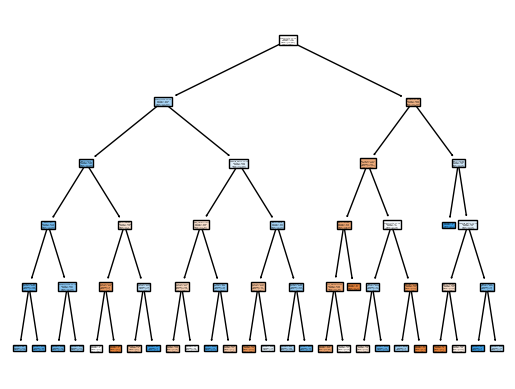

In [77]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
#plt.savefig('bestTree.svg', format='svg')
#plt.show()




0.6966666666666667
0.6966666666666667
0.6976223776223776
0.6975076923076923
0.6861538461538461
0.6966666666666667
0.6962696269626962
0.6966666666666667
0.735973597359736


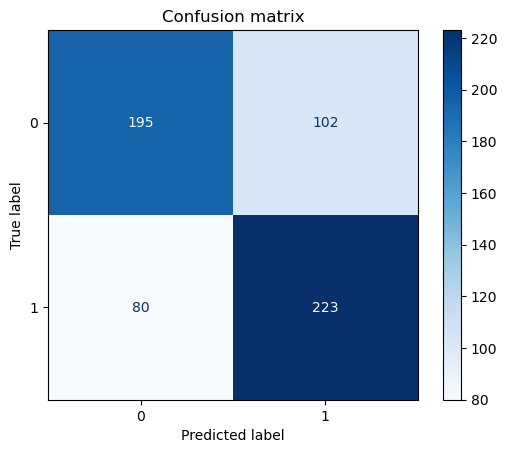

In [78]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees)
recallTrees = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### What does this mean?

Here we saw, that apparently one variable (namely "General_Health") is generally so predective that only its' classification is needed to get the overall best accuracy for a subset of 1000 cases, 5 decisions seem to have the best performance for the complete dataset.
Let's see how this behaves in other supervised algorithms.

# Multi-layer perceptron

In [79]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [80]:
# build perceptron

clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


train data accuracy: 0.71
test data accuracy: 0.71


### optimise Learning rate and network architecture

In [81]:
# allTrainAccuracies = []
# allTestAccuracies = []
# alphas = np.linspace(1e-10, 1, 100)
# for alpha in alphas:
#     clf = MLPClassifier(solver='sgd', # gradient descent = sgd
#                     alpha=alpha,
#                     hidden_layer_sizes=(10, 10), 
#                     random_state=12,
#                     max_iter=1000)
#     clf.fit(X_train, trainCrit)

#     # get accuracy score
#     allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
#     allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
#     #alphas.append(alpha)

# plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
# #plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

# plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
# #plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

# plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
# plt.xlabel("alpha")
# plt.ylabel("accuracy")
# plt.legend()
# #plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
# plt.show()


# bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

In [82]:
# allTrainAccuracies = []
# allTestAccuracies = []
# hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

# for i in range(len(hiddenLayerConfigs)):
#     layerConfig = hiddenLayerConfigs[i]
#     clf = MLPClassifier(solver='sgd', # gradient descent = sgd
#                     alpha=alphas[bestPerformingAlpha],
#                     hidden_layer_sizes= layerConfig, 
#                     random_state= 12,
#                     max_iter= 1000)
#     clf.fit(X_train, trainCrit)

#     # get accuracy score
#     allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
#     allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
#     #alphas.append(alpha)

# plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

# plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

# plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
# plt.xlabel("neural architecture")
# plt.ylabel("accuracy")
# plt.legend()
# #plt.savefig('mlp-accuracy-architecture.svg', format='svg')
# plt.show()


# bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
# hiddenLayerConfigs[bestPerformingLayerConfig]

train data accuracy: 0.71
test data accuracy: 0.71


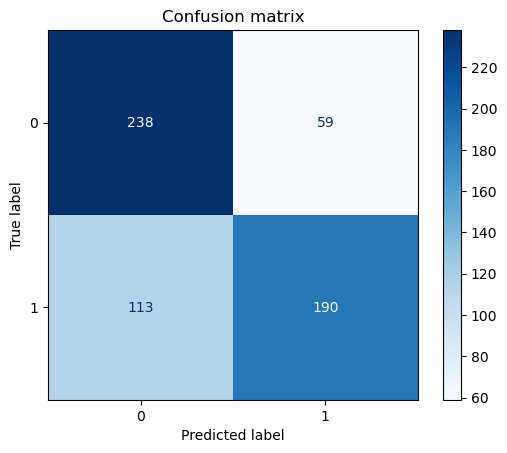

In [83]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes= (5), 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks = clf.score(X_test, testCrit)
precisionNeuralNetworks = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# K-Nearest Neighbours

In [84]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [85]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.62


### What k would make the best predictions?


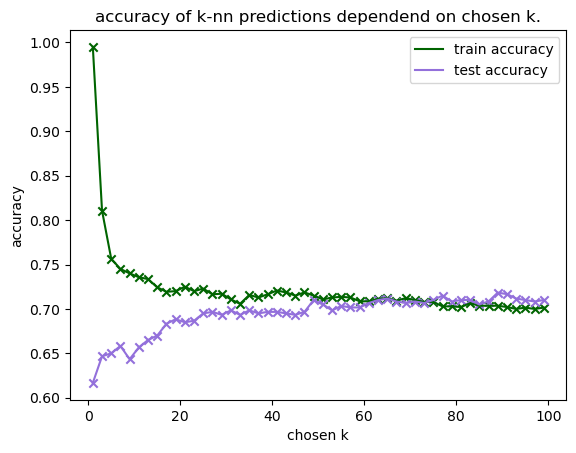

89


In [86]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 100, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('knn-accuracy-k.svg', format='svg')

plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.7
test data accuracy: 0.72


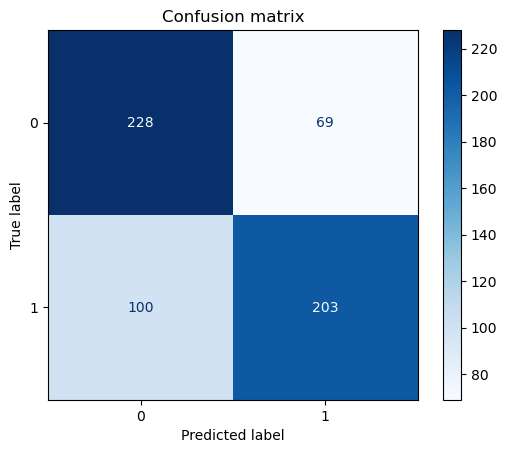

In [87]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn = precision_score(testCrit, y_pred_test, average='binary')
recallKnn = recall_score(testCrit, y_pred_test, average='binary')
F1Knn = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# Overall Performances of different supervised learning algorithms

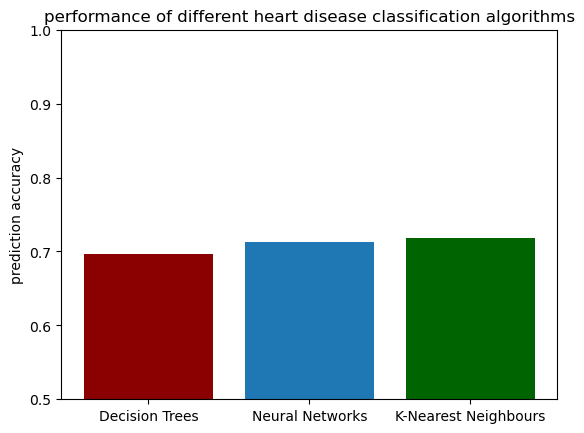

[0.6966666666666667, 0.7133333333333334, 0.7183333333333334]

In [88]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allAccuracies = [bestAccuracyTrees, bestAccuracyNeuralNetworks, bestAccuracyKnn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.bar(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([0.5, 1])
ax.set_ylabel("prediction accuracy")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-accuracy.svg', format='svg')
plt.show()

allAccuracies

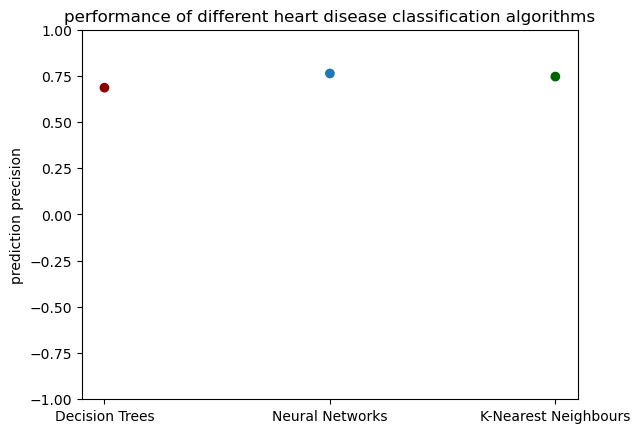

In [89]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allAccuracies = [precisionTrees, precisionNeuralNetworks, precisionKnn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 1])
ax.set_ylabel("prediction precision")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-precision.svg', format='svg')

plt.show()

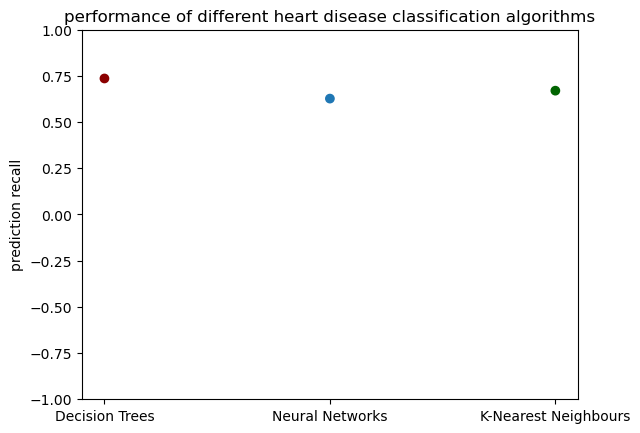

In [90]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allAccuracies = [recallTrees, recallNeuralNetworks, recallKnn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 1])
ax.set_ylabel("prediction recall")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-recall.svg', format='svg')

plt.show()

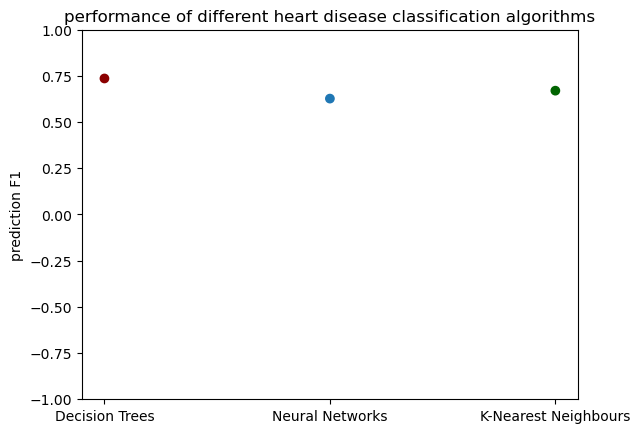

In [91]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allF1 = [F1Trees, F1NeuralNetworks, F1Knn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 1])
ax.set_ylabel("prediction F1")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-f1.svg', format='svg')

plt.show()

In [92]:
data["Heart_Disease"].value_counts(normalize=True)

Heart_Disease
1    0.5
0    0.5
Name: proportion, dtype: float64